Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
import tensorflow as tf

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier


Load the dataset

In [4]:
df = loadtxt('data_oversampled.csv',skiprows = 1, delimiter=',')

In [5]:
df

array([[  1. ,  85. ,  26.6,  31. ,   0. ],
       [  1. ,  89. ,  28.1,  21. ,   0. ],
       [  5. , 116. ,  25.6,  30. ,   0. ],
       ...,
       [ 11. , 120. ,  42.3,  48. ,   1. ],
       [ 12. ,  92. ,  27.6,  44. ,   1. ],
       [  6. , 102. ,  30.8,  36. ,   1. ]])

Splitting the dataset

In [6]:
# split into input (X) and output (y) variables
x = df[:,0:4]
y = df[:,4]

Standardisation

In [7]:
#Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)


Build the Keras Model

In [37]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 5 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.4468 - val_loss: 0.6935 - val_accuracy: 0.4909
Epoch 2/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5182 - val_loss: 0.6915 - val_accuracy: 0.5591
Epoch 3/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5851 - val_loss: 0.6905 - val_accuracy: 0.6682
Epoch 4/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5851 - val_loss: 0.6897 - val_accuracy: 0.7409
Epoch 5/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.6611 - val_loss: 0.6890 - val_accuracy: 0.7227
Epoch 6/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.6824 - val_loss: 0.6884 - val_accuracy: 0.7273
Epoch 7/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.6778 - val_loss: 0.6877 - val_accuracy: 0.7591
Epoch 8/150
4

In [38]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 700us/step - loss: 0.2520 - accuracy: 0.8982
Training Accuracy: 89.82
7/7 [==============================] - 0s 834us/step - loss: 0.4835 - accuracy: 0.8045
Validation Accuracy: 80.45


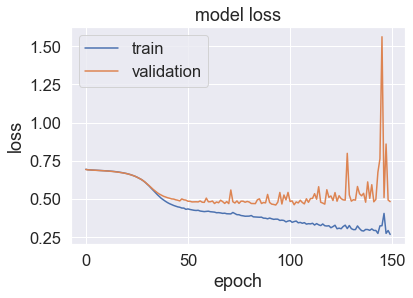

In [39]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [71]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 4 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu',kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=0, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_141 (Dense)           (None, 64)                320       
                                                                 
 dropout_38 (Dropout)        (None, 64)                0         
                                                                 
 dense_142 (Dense)           (None, 32)                2080      
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_143 (Dense)           (None, 16)                528       
                                                                 
 dropout_40 (Dropout)        (None, 16)                0         
                                                                 
 dense_144 (Dense)           (None, 8)               

In [72]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 700us/step - loss: 0.4584 - accuracy: 0.8100
Training Accuracy: 81.00
7/7 [==============================] - 0s 833us/step - loss: 0.4951 - accuracy: 0.7682
Validation Accuracy: 76.82


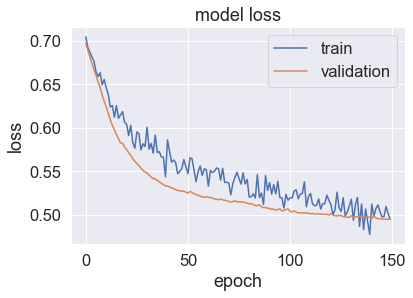

In [73]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [111]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 3 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(32, input_dim=4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu',kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5760 - val_loss: 0.6644 - val_accuracy: 0.7000
Epoch 2/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.5973 - val_loss: 0.6526 - val_accuracy: 0.7409
Epoch 3/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.6429 - val_loss: 0.6384 - val_accuracy: 0.7591
Epoch 4/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.6383 - val_loss: 0.6252 - val_accuracy: 0.7545
Epoch 5/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.6854 - val_loss: 0.6107 - val_accuracy: 0.7318
Epoch 6/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.6717 - val_loss: 0.5982 - val_accuracy: 0.7227
Epoch 7/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.6824 - val_loss: 0.5863 - val_accuracy: 0.7136
Epoch 8/150
4

In [112]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 600us/step - loss: 0.4080 - accuracy: 0.8207
Training Accuracy: 82.07
7/7 [==============================] - 0s 833us/step - loss: 0.4455 - accuracy: 0.7818
Validation Accuracy: 78.18


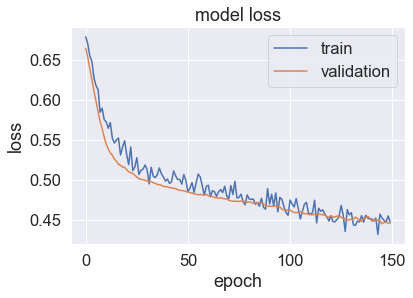

In [113]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [160]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 2 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5046 - val_loss: 0.6916 - val_accuracy: 0.5455
Epoch 2/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.5182 - val_loss: 0.6893 - val_accuracy: 0.5227
Epoch 3/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5365 - val_loss: 0.6863 - val_accuracy: 0.5500
Epoch 4/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5532 - val_loss: 0.6833 - val_accuracy: 0.5773
Epoch 5/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5805 - val_loss: 0.6801 - val_accuracy: 0.5955
Epoch 6/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6792 - accuracy: 0.5714 - val_loss: 0.6775 - val_accuracy: 0.6045
Epoch 7/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5729 - val_loss: 0.6739 - val_accuracy: 0.6182
Epoch 8/150
4

In [161]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 650us/step - loss: 0.4308 - accuracy: 0.8085
Training Accuracy: 80.85
7/7 [==============================] - 0s 667us/step - loss: 0.4642 - accuracy: 0.7773
Validation Accuracy: 77.73


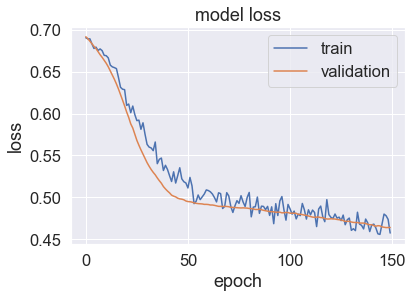

In [162]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [184]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# 1 hidden layers
# define the keras model
model = Sequential()

model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 0s 3ms/step - loss: 0.7408 - accuracy: 0.5061 - val_loss: 0.7328 - val_accuracy: 0.5045
Epoch 2/150
42/42 [==============================] - 0s 1ms/step - loss: 0.7106 - accuracy: 0.5304 - val_loss: 0.7161 - val_accuracy: 0.5045
Epoch 3/150
42/42 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.5395 - val_loss: 0.7010 - val_accuracy: 0.5273
Epoch 4/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5547 - val_loss: 0.6908 - val_accuracy: 0.5727
Epoch 5/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.6109 - val_loss: 0.6826 - val_accuracy: 0.5909
Epoch 6/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.6322 - val_loss: 0.6738 - val_accuracy: 0.6364
Epoch 7/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.6322 - val_loss: 0.6661 - val_accuracy: 0.6727
Epoch 8/150
4

In [185]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 650us/step - loss: 0.4496 - accuracy: 0.7948
Training Accuracy: 79.48
7/7 [==============================] - 0s 667us/step - loss: 0.4863 - accuracy: 0.7545
Validation Accuracy: 75.45


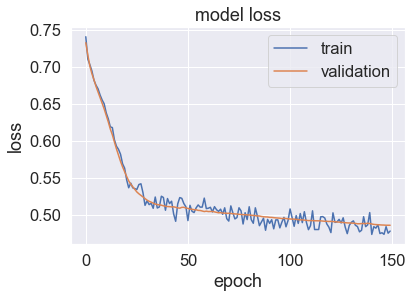

In [186]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [196]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

# NO hidden layers
# define the keras model
model = Sequential()

model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 0s 6ms/step - loss: 0.7781 - accuracy: 0.4195 - val_loss: 0.7405 - val_accuracy: 0.4727
Epoch 2/150
42/42 [==============================] - 0s 1ms/step - loss: 0.7401 - accuracy: 0.4757 - val_loss: 0.7145 - val_accuracy: 0.5091
Epoch 3/150
42/42 [==============================] - 0s 1ms/step - loss: 0.7236 - accuracy: 0.5137 - val_loss: 0.6948 - val_accuracy: 0.5409
Epoch 4/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5578 - val_loss: 0.6803 - val_accuracy: 0.5636
Epoch 5/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.5805 - val_loss: 0.6676 - val_accuracy: 0.5864
Epoch 6/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6185 - val_loss: 0.6548 - val_accuracy: 0.6091
Epoch 7/150
42/42 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.6581 - val_loss: 0.6431 - val_accuracy: 0.6318
Epoch 8/150
4

In [197]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 600us/step - loss: 0.4649 - accuracy: 0.7538
Training Accuracy: 75.38
7/7 [==============================] - 0s 667us/step - loss: 0.4949 - accuracy: 0.7091
Validation Accuracy: 70.91


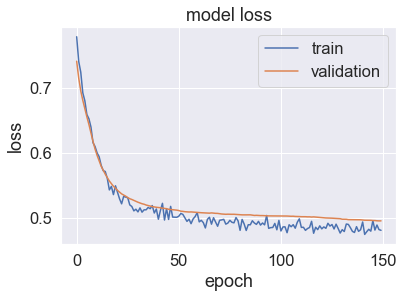

In [198]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()